In [0]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [0]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

<h4>Use scikit-learn library in the following cell</h4>

In [110]:
# Task 1-1: use linear regression in sklearn

#for creating the linear regression object
regressor = linear_model.LinearRegression()

#for training the model using the traing data
regressor.fit(train_data, train_target)

# Task 1-2: show intercept and coefficents

#for printing the intercept
print('Intercept is =',regressor.intercept_)

#for printing the coefficients
print('Coefficients is =',regressor.coef_)

# Task 1-3: show errors on training dataset and testing dataset

#for printing the error, Mean Squared Error(MSE) = 1/2(mean((target-prediction)^2))

#Prediction using testing data
test_pred=regressor.predict(test_data)

#Prediction using training data
train_pred=regressor.predict(train_data)

#Mean Squared Error for testing data
print('The MSE for testing data: %.4f'  %((np.square(np.subtract(test_target,test_pred)).mean())/2))
      
#Mean Squared Error for training data
print('The MSE for training data: %.4f' %((np.square(np.subtract(train_target,train_pred)).mean())/2))

Intercept is = [30.24675099]
Coefficients is = [[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]
The MSE for testing data: 12.1456
The MSE for training data: 10.8207


<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

In [111]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights

#Weights=(X.T * X)^(-1) * X.T * y
def myNormalEqualFun(X,y):
  XTranspose=X.T
  Weights=inv(XTranspose.dot(X)).dot(XTranspose).dot(y)
  return Weights
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions

#Predictions=X.w
def myPredictFun(X,w):
  Predictions=X.dot(w)
  return Predictions

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)


# Task 2-3: show intercept and coefficents

#for printing the intercept
print('Intercept is =',w[0])

#for printing the coefficients
print('Coefficients is =',w[1:14])

# Task 2-4: show errors on training dataset and testing dataset
#for printing the error, Mean Squared Error(MSE) = 1/2(mean((target-prediction)^2))

#Prediction using testing data
test_pred=myPredictFun(test_data_intercept,w)

#Prediction using training data
train_pred=myPredictFun(train_data_intercept,w)

#Mean Squared Error for testing data
print('The MSE for testing data: %.4f'  %((np.square(np.subtract(test_target,test_pred)).mean())/2))
      
#Mean Squared Error for training data
print('The MSE for training data: %.4f' %((np.square(np.subtract(train_target,train_pred)).mean())/2))

Intercept is = [30.24675099]
Coefficients is = [[-1.13055924e-01]
 [ 3.01104641e-02]
 [ 4.03807204e-02]
 [ 2.78443820e+00]
 [-1.72026334e+01]
 [ 4.43883520e+00]
 [-6.29636221e-03]
 [-1.44786537e+00]
 [ 2.62429736e-01]
 [-1.06467863e-02]
 [-9.15456240e-01]
 [ 1.23513347e-02]
 [-5.08571424e-01]]
The MSE for testing data: 12.1456
The MSE for training data: 10.8207


<h4>Use numerical solution (baisc gradient descent) to perform linear regression in the following cell</h4>

Final weights: [[22.79653465]
 [-1.00212151]
 [ 0.69623602]
 [ 0.27800247]
 [ 0.71874814]
 [-2.02231257]
 [ 3.14525466]
 [-0.1760535 ]
 [-3.08189965]
 [ 2.2512189 ]
 [-1.7668042 ]
 [-2.03774592]
 [ 1.12956718]
 [-3.61164924]]
Intercept is = [22.79653465]
Coefficients is = [[-1.00212151]
 [ 0.69623602]
 [ 0.27800247]
 [ 0.71874814]
 [-2.02231257]
 [ 3.14525466]
 [-0.1760535 ]
 [-3.08189965]
 [ 2.2512189 ]
 [-1.7668042 ]
 [-2.03774592]
 [ 1.12956718]
 [-3.61164924]]
The MSE for testing data: 12.1456
The MSE for training data: 10.8207


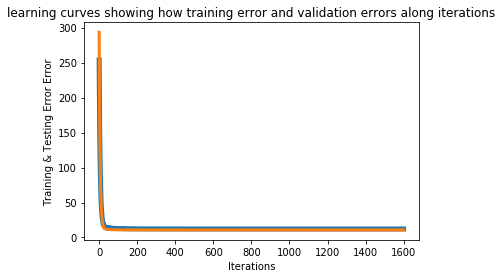

In [112]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: the final Weights
#         the loss history along iterations

def  cal_cost(weight,X,y):                                                       #Function of calculating loss=1/2m(((X.w)−y)^2)
  m = len(y)
  predictions = X.dot(weight)
  cost = (1/2*m) * np.sum(np.square(predictions-y))
  return cost

def myGradientDescentFun(X,y,learning_rate,numItrs):
  weight = np.random.rand(X[0].size,1)                                           #randomly generated weights
  m = len(y)                                                                     #m=length of training labels
  loss_history = np.zeros(numItrs)                                               #Initializing loss history with 0
  for it in range(numItrs):                                                      
    prediction = np.dot(X,weight)                                                #Prediction=X.w
    weight = weight -(1/m)*learning_rate*( X.T.dot((prediction - y)))            #weight=weight-learning_rate*gradient descent
    loss_history[it]  = cal_cost(weight,X,y)                                     #Loss History=Array of the loss values over numItrs
  return weight,loss_history

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions

#Predictions=X.w
def myPredictFun(X,w):
    Predictions=X.dot(w)
    return Predictions

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w, loss = myGradientDescentFun(train_data_intercept,train_target,0.09,1600)
print("Final weights:",w)

# Task 3-3: show intercept and coefficents

#for printing the intercept
print('Intercept is =',w[0])

#for printing the coefficients
print('Coefficients is =',w[1:14])

# Task 3-4: show errors on training dataset and testing dataset

#for printing the error, Mean Squared Error(MSE) = 1/2(mean((target-prediction)^2))

#Prediction using testing data
test_pred=myPredictFun(test_data_intercept,w)

#Prediction using training data
train_pred=myPredictFun(train_data_intercept,w)

#Mean Squared Error for testing data
testing_error=(np.square(np.subtract(test_target,test_pred)).mean())/2
print('The MSE for testing data: %.4f' %testing_error)

#Mean Squared Error for training data
training_error=(np.square(np.subtract(train_target,train_pred)).mean())/2
print('The MSE for training data: %.4f' %training_error)
  
# # Task 3-5: plot learning curves showing training errors and testing errors along iterations
iterations=1600
testing_error=np.zeros(iterations)
training_error=np.zeros(iterations)

for i in range (iterations):
  w, loss = myGradientDescentFun(train_data_intercept,train_target,0.09,i)
  test_pred=myPredictFun(test_data_intercept,w)
  testing_error[i]=(np.square(np.subtract(test_target,test_pred)).mean())/2
  train_pred=myPredictFun(train_data_intercept,w)
  training_error[i]=(np.square(np.subtract(train_target,train_pred)).mean())/2
# print('Testing Error',testing_error[1200:1599])
# print('Training Error',training_error[1200:1599])
  

plt.title("learning curves showing how training error and validation errors along iterations")
plt.xlabel('Iterations')
plt.ylabel('Training & Testing Error Error') 
#plt.plot(loss)
plt.plot(testing_error,linewidth=5,label="Validation Error")
plt.plot(training_error,linewidth=3,label="Testing Error")           
plt.show()

<h4>Use numerical solution (stochastic gradient descent) to perform linear regression in the following cell</h4>

Intercept is = [22.79557205]
Coefficients is = [[-1.00344298]
 [ 0.69444711]
 [ 0.27659624]
 [ 0.72088767]
 [-2.02120334]
 [ 3.14069439]
 [-0.17374041]
 [-3.08349365]
 [ 2.24308854]
 [-1.75379073]
 [-2.03560411]
 [ 1.12895392]
 [-3.60989724]]
The MSE for testing data: 12.1405
The MSE for training data: 10.8208


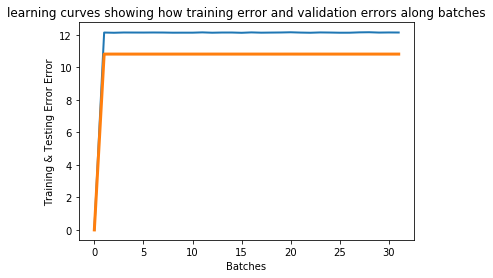

In [115]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 4-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of epoches, batch size
# Output: the final Weights
#         the loss history along batches

def  cal_cost(weight,X,y):                                                       ##Function of calculating loss=1/2m(((X.w)−y)^2)
  m = len(y)
  predictions = X.dot(weight)
  cost = (1/2*m) * np.sum(np.square(predictions-y))
  return cost
           
def create_mini_batch(X,y,batchsize):                                            #Function for creating mini-batches for the calculating the gradient descent
  mini_batches=[]
  data=np.hstack((X,y))
  np.random.shuffle(data)
  n_minibatches=data.shape[0]
  i=0
  
  for i in range(n_minibatches + 1):
    mini_batch=data[i*batchsize:(i+1)*batchsize,:]
    X_mini=mini_batch[:,:-1]
    Y_mini=mini_batch[:,-1].reshape((-1,1))
    mini_batches.append((X_mini,Y_mini))
  if data.shape[0] % batchsize!=0:
    mini_batch=data[i*batchsize:data.shape[0]]
    X_mini=mini_batch[:,:-1]
    Y_mini=mini_batch[:,-1].reshape((-1,1))
    mini_batches.append((X_mini,Y_mini))
  return mini_batches
  
def myGradientDescentFun(X,y,learning_rate,epoches, batchsize):
  
    weight= np.zeros((X.shape[1], 1))                                            #randomly generated weights  
    losshist=[]                                       
    loss_history=np.zeros(epoches)                                               #Initializing loss history with 0                                 
    m = len(y)                                                                   #m=length of training labels                 
    
    for itr in range(epoches):                                                   #Looping over the epochs
      loss=0.0
      mini_batches=create_mini_batch(X,y,batchsize)                              #Storing the minibatch values
      for mini_batch in mini_batches:                                            #Looping over each batch
        X_i,y_i = mini_batch
        prediction = np.dot(X_i,weight)                                          #Prediction=X.w
        weight = weight -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))    #weight=weight-learning_rate*gradient descent
        loss+=(cal_cost(weight,X_i,y_i))                                         #Storing the loss values  
        losshist.append(loss)                                                     #Loss History=Array of the loss values over each batch
      loss_history[itr]=loss                                                     #Loss History=Array of the loss values over numItrs
    return weight,loss_history
  
# Task 4-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions

#Predictions=X.w
def myPredictFun(X,w):
    Predictions=X.dot(w)
    return Predictions
  
# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w, loss = myGradientDescentFun(train_data_intercept,train_target,0.09,910,32)

# Task 4-3: show intercept and coefficents

#for printing the intercept
print('Intercept is =',w[0])

#for printing the coefficients
print('Coefficients is =',w[1:14])

# Task 4-4: show errors on training dataset and testing dataset

#for printing the error, Mean Squared Error(MSE) = 1/2(mean((target-prediction)^2))

#Prediction using testing data
test_pred=myPredictFun(test_data_intercept,w)

#Prediction using training data
train_pred=myPredictFun(train_data_intercept,w)

#Mean Squared Error for testing data
testing_error=(np.square(np.subtract(test_target,test_pred)).mean())/2
print('The MSE for testing data: %.4f' %testing_error)
      
#Mean Squared Error for training data
training_error=(np.square(np.subtract(train_target,train_pred)).mean())/2
print('The MSE for training data: %.4f' %training_error)

# Task 4-5: plot learning curves showing training errors and testing errors along batch
batch=32
testing_error=np.zeros(batch)
training_error=np.zeros(batch)
 
for i in range (1,batch):
  w, loss = myGradientDescentFun(train_data_intercept,train_target,0.09,910,i)
  test_pred=myPredictFun(test_data_intercept,w)
  testing_error[i]=(np.square(np.subtract(test_target,test_pred)).mean())/2
  train_pred=myPredictFun(train_data_intercept,w)
  training_error[i]=(np.square(np.subtract(train_target,train_pred)).mean())/2

plt.title("learning curves showing how training error and validation errors along batches")
plt.xlabel('Batches')
plt.ylabel('Training & Testing Error Error') 
#plt.plot(loss)
plt.plot(testing_error,linewidth=2,label='Validation Error')
plt.plot(training_error,linewidth=3,label='Training Error')           
plt.show()


  